AUTHOR:         
marwa Osman: marwaosman9975@gmail.com    

👉 LinkedIn:  https://www.linkedin.com/in/marwa-osman-00190b222/

👉 GitHub:  https://github.com/marwa9975

# Titanic Exploratory Data Analysis (EDA)

This project focuses on conducting data cleaning and exploratory data analysis (EDA) on the Titanic dataset.The Titanic dataset is a well-known dataset that provides insights into the demographics and survival rates of passengers aboard the Titanic.

## DATA UNDERSTANDING

The datasets is obtained from Kaggle: [Titanic](https://www.kaggle.com/c/titanic/data)   
 
The dataset contains 891 rows (entries) and 12 columns    
The columns are:       

``PassengerId``: Unique identifier for each passenger.    
``Survived``: Binary variable indicating survival (1 = Survived, 0 = Did Not Survive).    
``Pclass``: Ticket class (1st, 2nd, 3rd class).     
``Name``: Passenger's name.    
``Sex``: Gender of the passenger.      
``Age``: Age of the passenger.     
``SibSp``: Number of siblings/spouses aboard.     
``Parch``: Number of parents/children aboard.     
``Ticket``: Ticket number.    
``Fare``: Passenger fare.    
``Cabin``: Cabin number.        
``Embarked``: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)       


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats

In [76]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
    
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
    
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
    
    def get_info(self):
        info = self.df.info()
        return info
    
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes
    
    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts

    

In [77]:
# Preview the dataset
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(df)

In [79]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
# get summary of the data
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains 891 rows (entries) and 12 columns 


In [81]:
# Get data types
du.get_dtypes()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
# Those who Survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## DATA PREPARATION

##### Check for missing values

In [83]:
# Check for missing values
du.get_missing_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Dealing with the missing values   


Since a large percentage of values in the Cabin column are missing i can choose to drop this column.

In [84]:
# Drop the cabin column
df = df.drop('Cabin', axis=1)

For the Embarked column,I can impute missing values with the most frequent port

In [85]:
# Find the most frequent port (mode) in the Embarked column
most_frequent_port = df['Embarked'].mode()[0]
# Fill missing Embarked values with the most frequent port
df['Embarked'].fillna(most_frequent_port, inplace=True)

In [86]:
# Remove rows with missing ages
df.dropna(subset=['Age'], inplace=True)


##### Value counts

In [87]:
# get value counts
du.get_value_counts()

{'PassengerId': 1      1
 599    1
 588    1
 589    1
 590    1
       ..
 301    1
 302    1
 303    1
 304    1
 891    1
 Name: PassengerId, Length: 891, dtype: int64,
 'Survived': 0    549
 1    342
 Name: Survived, dtype: int64,
 'Pclass': 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 'Name': Braund, Mr. Owen Harris                     1
 Boulos, Mr. Hanna                           1
 Frolicher-Stehli, Mr. Maxmillian            1
 Gilinski, Mr. Eliezer                       1
 Murdlin, Mr. Joseph                         1
                                            ..
 Kelly, Miss. Anna Katherine "Annie Kate"    1
 McCoy, Mr. Bernard                          1
 Johnson, Mr. William Cahoone Jr             1
 Keane, Miss. Nora A                         1
 Dooley, Mr. Patrick                         1
 Name: Name, Length: 891, dtype: int64,
 'Sex': male      577
 female    314
 Name: Sex, dtype: int64,
 'Age': 24.00    30
 22.00    27
 18.00    26
 19.00    25
 28.00   

#### Checking for duplicates
PassengerId will be used here since it is a unuque identifier

In [88]:
# check for duplicates 
df.duplicated(subset='PassengerId').sum()

0

#### Check for Outliers and removing Outliers

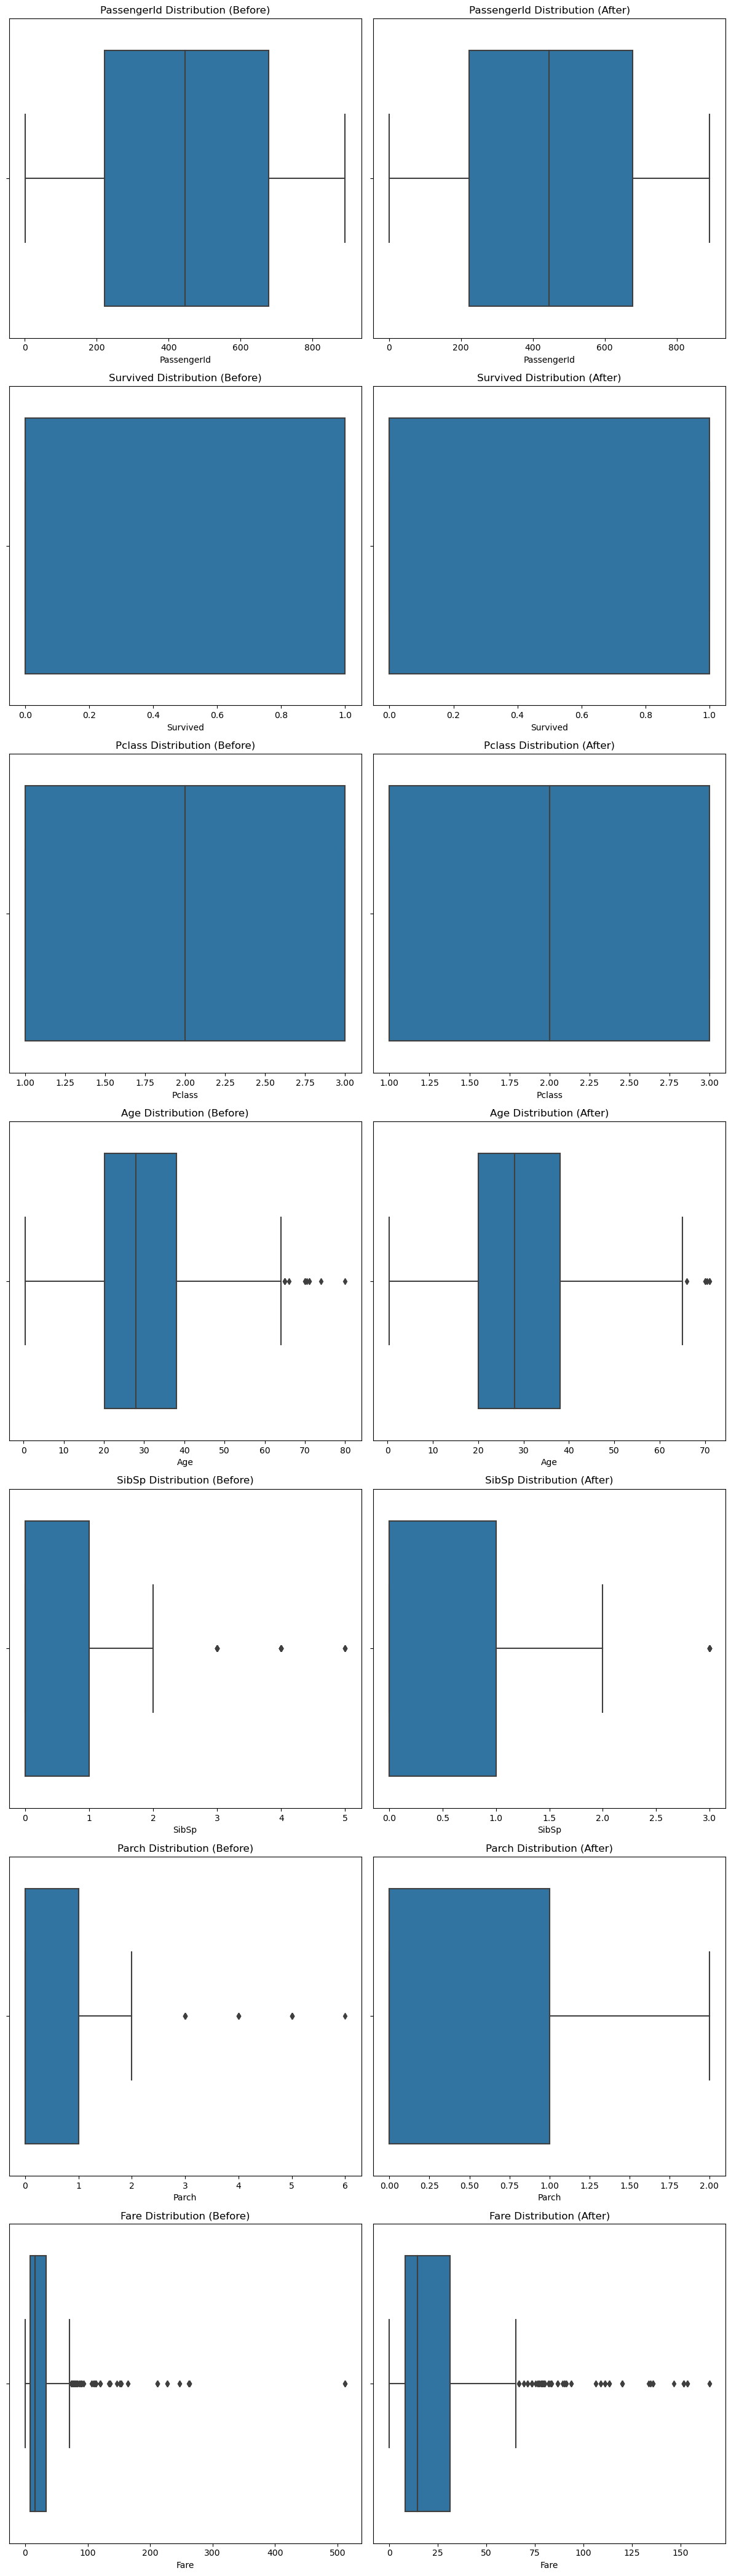

In [89]:
# Function to check for outliers by plotting
def outlier_plot_box(df, column_name, ax=None):
    sns.boxplot(x=df[column_name], ax=ax)

# Function to remove outliers
def remove_outliers(data, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(data[col]))
        data = data[(z_scores < threshold)]
    return data

# Function to plot outliers before and after removal
def plot_outliers_before_and_after(df, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        # Plot boxplot before removing outliers
        outlier_plot_box(df, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

        # Remove outliers
        df_cleaned = remove_outliers(df, [column], threshold=threshold)

        # Plot boxplot after removing outliers
        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()

# Call the function to plot outliers before and after removal
plot_outliers_before_and_after(df, numerical_columns)


## EXPLORATORY DATA ANALYSIS